In [2]:
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import tree

In [3]:
gf_data=pd.read_csv('German_Fraud_Credit_Dataset.csv')
gf_data.head()

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [4]:
gf_data.shape

(1000, 21)

In [5]:
gf_data.isnull().sum()

over_draft                0
credit_usage              0
credit_history            0
purpose                   0
current_balance           0
Average_Credit_Balance    0
employment                0
location                  0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
cc_age                    0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [6]:
gf_data.dtypes

over_draft                object
credit_usage               int64
credit_history            object
purpose                   object
current_balance            int64
Average_Credit_Balance    object
employment                object
location                   int64
personal_status           object
other_parties             object
residence_since            int64
property_magnitude        object
cc_age                     int64
other_payment_plans       object
housing                   object
existing_credits           int64
job                       object
num_dependents             int64
own_telephone             object
foreign_worker            object
class                     object
dtype: object

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
over_draft = LabelEncoder()
gf_data['over_draft'] = over_draft.fit_transform(gf_data['over_draft'])

credit_history = LabelEncoder()
gf_data['credit_history'] = credit_history.fit_transform(gf_data['credit_history'])

purpose = LabelEncoder()
gf_data['purpose'] = purpose.fit_transform(gf_data['purpose'])

Average_Credit_Balance = LabelEncoder()
gf_data['Average_Credit_Balance'] = Average_Credit_Balance.fit_transform(gf_data['Average_Credit_Balance'])

employment = LabelEncoder()
gf_data['employment'] = employment.fit_transform(gf_data['employment'])

personal_status = LabelEncoder()
gf_data['personal_status'] = personal_status.fit_transform(gf_data['personal_status'])

other_parties = LabelEncoder()
gf_data['other_parties'] = other_parties.fit_transform(gf_data['other_parties'])

property_magnitude = LabelEncoder()
gf_data['property_magnitude'] = property_magnitude.fit_transform(gf_data['property_magnitude'])

other_payment_plans = LabelEncoder()
gf_data['other_payment_plans'] = other_payment_plans.fit_transform(gf_data['other_payment_plans'])

housing = LabelEncoder()
gf_data['housing'] = housing.fit_transform(gf_data['housing'])

job = LabelEncoder()
gf_data['job'] = job.fit_transform(gf_data['job'])

own_telephone = LabelEncoder()
gf_data['own_telephone'] = own_telephone.fit_transform(gf_data['own_telephone'])

foreign_worker = LabelEncoder()
gf_data['foreign_worker'] = foreign_worker.fit_transform(gf_data['foreign_worker'])

class1 = LabelEncoder()
gf_data['class'] = class1.fit_transform(gf_data['class'])


gf_data.head()

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,6,1,7,1169,4,3,4,3,2,...,2,67,1,1,2,3,1,1,1,1
1,0,48,3,7,5951,2,0,2,0,2,...,2,22,1,1,1,3,1,0,1,0
2,3,12,1,4,2096,2,1,2,3,2,...,2,49,1,1,1,2,2,0,1,1
3,1,42,3,5,7882,2,1,2,3,1,...,0,45,1,0,1,3,2,0,1,1
4,1,24,2,1,4870,2,0,3,3,2,...,1,53,1,0,2,3,2,0,1,0


In [9]:
gf_data.dtypes

over_draft                int32
credit_usage              int64
credit_history            int32
purpose                   int32
current_balance           int64
Average_Credit_Balance    int32
employment                int32
location                  int64
personal_status           int32
other_parties             int32
residence_since           int64
property_magnitude        int32
cc_age                    int64
other_payment_plans       int32
housing                   int32
existing_credits          int64
job                       int32
num_dependents            int64
own_telephone             int32
foreign_worker            int32
class                     int32
dtype: object

In [10]:
x=gf_data.drop(['class'],axis=1)
y=gf_data['class']


In [11]:
x.head()

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,residence_since,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,1,6,1,7,1169,4,3,4,3,2,4,2,67,1,1,2,3,1,1,1
1,0,48,3,7,5951,2,0,2,0,2,2,2,22,1,1,1,3,1,0,1
2,3,12,1,4,2096,2,1,2,3,2,3,2,49,1,1,1,2,2,0,1
3,1,42,3,5,7882,2,1,2,3,1,4,0,45,1,0,1,3,2,0,1
4,1,24,2,1,4870,2,0,3,3,2,4,1,53,1,0,2,3,2,0,1


In [12]:
y.head(5)

0    1
1    0
2    1
3    1
4    0
Name: class, dtype: int32

In [13]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=.4)

In [14]:
ctree=tree.DecisionTreeClassifier()
ctree.fit(x_train, y_train)
y_pred=ctree.predict(x_test)
ctree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [15]:
print(metrics.accuracy_score(y_test,y_pred))

0.675


In [16]:
comp_df=x_test.copy()
comp_df['actual_value']=y_test
comp_df['predicted_value']=y_pred
comp_df.head()

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,actual_value,predicted_value
653,0,36,2,1,8086,0,3,2,3,2,...,42,1,1,4,0,1,1,1,0,0
780,0,39,1,7,4933,2,1,2,3,1,...,25,1,1,2,3,1,0,1,0,1
72,1,8,1,6,1164,2,3,3,3,2,...,51,0,0,2,0,2,1,1,1,1
99,0,20,2,2,7057,4,1,3,3,2,...,36,0,2,2,0,2,1,1,1,0
227,1,12,3,5,7865,2,3,4,3,2,...,53,1,0,1,0,1,1,1,0,0


In [17]:
feature_imp=pd.DataFrame()
feature_imp['col']=x.columns
feature_imp['imp']=ctree.feature_importances_*100

feature_imp.sort_values('imp',ascending=False)

,col,imp
0,over_draft,16.450660
4,current_balance,15.972634
1,credit_usage,10.857691
3,purpose,8.810804
12,cc_age,7.386029
10,residence_since,4.571913
2,credit_history,4.485319
14,housing,4.090789
16,job,3.746816
11,property_magnitude,3.560044


In [18]:
x=x.drop(['housing','credit_history','existing_credits','own_telephone','foreign_worker'],axis=1)
x.head()

,over_draft,credit_usage,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,residence_since,property_magnitude,cc_age,other_payment_plans,job,num_dependents
0,1,6,7,1169,4,3,4,3,2,4,2,67,1,3,1
1,0,48,7,5951,2,0,2,0,2,2,2,22,1,3,1
2,3,12,4,2096,2,1,2,3,2,3,2,49,1,2,2
3,1,42,5,7882,2,1,2,3,1,4,0,45,1,3,2
4,1,24,1,4870,2,0,3,3,2,4,1,53,1,3,2


In [19]:
cross_val_score(ctree,x,y,cv=25,scoring='accuracy').mean()

0.674

In [20]:
param_grid= {"criterion"          : ['gini', 'entropy'],
             "max_features"       : [10,11,12,13,14],
             "splitter"           : ['best', 'random'],
             "min_samples_leaf"  : [17,18,19,20,21,22],
             "max_depth"          : [8,9,10,11,12]
            }

In [21]:
optimized_tree=GridSearchCV(ctree, param_grid, scoring='recall', verbose=2, cv=30)

In [22]:
optimized_tree.fit(x_train,y_train)

Fitting 30 folds for each of 600 candidates, totalling 18000 fits
[CV] criterion=gini, max_depth=8, max_features=10, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=10, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=10, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=10, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=10, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=10, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=10, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=10, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=10, min_samples_leaf=17, splitter=best 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV]  criterion=gini, max_depth=8, max_features=10, min_samples_leaf=17, splitter=best, total=   0.1s
[CV] criterion=gini, max_depth=8, max_features=10, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=10, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=10, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=10, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=10, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=10, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=10, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=10, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=10, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=10, mi

[CV]  criterion=gini, max_depth=8, max_features=10, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=10, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=10, min_samples_leaf=17, splitter=random, total=   0.1s
[CV] criterion=gini, max_depth=8, max_features=10, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=10, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=10, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=10, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=10, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=10, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=10, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=8, 

[CV]  criterion=gini, max_depth=8, max_features=10, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=10, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=10, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=10, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=10, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=10, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=10, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=10, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=10, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=10, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=8, 

[CV]  criterion=gini, max_depth=8, max_features=10, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=10, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=10, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=10, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=10, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=10, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=10, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=10, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=10, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=10, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=10, min

[CV] criterion=gini, max_depth=8, max_features=10, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=10, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=10, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=10, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=10, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=10, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=10, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=10, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=10, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=10, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=10, min_

[CV]  criterion=gini, max_depth=8, max_features=10, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=10, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=10, min_samples_leaf=20, splitter=random, total=   0.1s
[CV] criterion=gini, max_depth=8, max_features=10, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=10, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=10, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=10, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=10, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=10, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=10, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=8, 

[CV] criterion=gini, max_depth=8, max_features=10, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=10, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=10, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=10, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=10, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=10, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=10, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=10, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=10, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=10, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, m

[CV]  criterion=gini, max_depth=8, max_features=10, min_samples_leaf=22, splitter=best, total=   0.1s
[CV] criterion=gini, max_depth=8, max_features=10, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=10, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=10, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=10, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=10, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=10, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=10, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=10, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=10, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=1

[CV]  criterion=gini, max_depth=8, max_features=11, min_samples_leaf=17, splitter=best, total=   0.1s
[CV] criterion=gini, max_depth=8, max_features=11, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=11, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=11, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=11, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=11, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=11, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=11, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=11, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=11, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=11, min

[CV]  criterion=gini, max_depth=8, max_features=11, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=11, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=11, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=11, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=11, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=11, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=11, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=11, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=11, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=11, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=11, min

[CV]  criterion=gini, max_depth=8, max_features=11, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=11, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=11, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=11, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=11, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=11, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=11, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=11, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=11, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=11, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=8, 

[CV]  criterion=gini, max_depth=8, max_features=11, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=11, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=11, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=11, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=11, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=11, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=11, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=11, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=11, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=11, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=8, 

[CV]  criterion=gini, max_depth=8, max_features=11, min_samples_leaf=20, splitter=best, total=   0.1s
[CV] criterion=gini, max_depth=8, max_features=11, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=11, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=11, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=11, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=11, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=11, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=11, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=11, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=11, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=11, min

[CV] criterion=gini, max_depth=8, max_features=11, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=11, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=11, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=11, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=11, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=11, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=11, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=11, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=11, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=11, min_samples_leaf=21, splitter=best, total=   0.1s
[CV] criterion=gini, max_depth=8, max_features=11, min_

[CV]  criterion=gini, max_depth=8, max_features=11, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=11, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=11, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=11, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=11, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=11, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=11, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=11, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=11, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=11, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=8, 

[CV]  criterion=gini, max_depth=8, max_features=11, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=11, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=11, min_samples_leaf=22, splitter=random, total=   0.1s
[CV] criterion=gini, max_depth=8, max_features=11, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=11, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=11, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=11, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=11, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=11, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=11, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=8, 

[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=12, min

[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=18, splitter=best, total=   0.1s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=12, m

[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=8, 

[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=1

[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=20, splitter=best, total=   0.1s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=12, min

[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=12, m

[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=8, 

[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=22, splitter=best, total=   0.1s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=12, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=12, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=8, max_featur

[CV]  criterion=gini, max_depth=8, max_features=13, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=13, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=13, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=13, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=13, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=13, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=13, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=13, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=13, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=13, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=13, min

[CV]  criterion=gini, max_depth=8, max_features=13, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=13, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=13, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=13, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=13, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=13, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=13, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=13, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=13, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=13, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=13, m

[CV]  criterion=gini, max_depth=8, max_features=13, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=13, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=13, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=13, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=13, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=13, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=13, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=13, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=13, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=13, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=8, 

[CV]  criterion=gini, max_depth=8, max_features=13, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=13, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=13, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=13, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=13, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=13, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=13, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=13, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=13, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=13, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=1

[CV]  criterion=gini, max_depth=8, max_features=13, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=13, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=13, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=13, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=13, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=13, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=13, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=13, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=13, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=13, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=13, min

[CV] criterion=gini, max_depth=8, max_features=13, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=13, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=13, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=13, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=13, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=13, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=13, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=13, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=13, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=13, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=

[CV]  criterion=gini, max_depth=8, max_features=13, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=13, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=13, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=13, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=13, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=13, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=13, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=13, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=13, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=13, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=8, 

[CV]  criterion=gini, max_depth=8, max_features=13, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=13, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=13, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=13, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=13, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=13, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=13, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=13, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=13, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=13, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=8, 

[CV]  criterion=gini, max_depth=8, max_features=14, min_samples_leaf=17, splitter=best, total=   0.1s
[CV] criterion=gini, max_depth=8, max_features=14, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=14, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=14, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=14, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=14, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=14, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=14, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=14, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=14, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=14, min

[CV]  criterion=gini, max_depth=8, max_features=14, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=14, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=14, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=14, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=14, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=14, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=14, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=14, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=14, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=14, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=14, min

[CV]  criterion=gini, max_depth=8, max_features=14, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=14, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=14, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=14, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=14, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=14, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=14, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=14, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=14, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=14, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=8, 

[CV]  criterion=gini, max_depth=8, max_features=14, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=14, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=14, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=14, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=14, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=14, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=14, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=14, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=14, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=14, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=8, 

[CV]  criterion=gini, max_depth=8, max_features=14, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=14, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=14, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=14, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=14, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=14, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=14, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=14, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=14, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=14, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=14, min

[CV]  criterion=gini, max_depth=8, max_features=14, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=14, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=14, min_samples_leaf=21, splitter=best, total=   0.1s
[CV] criterion=gini, max_depth=8, max_features=14, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=14, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=14, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=14, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=14, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=14, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=14, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=8, max_features=14, min

[CV]  criterion=gini, max_depth=8, max_features=14, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=14, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=14, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=14, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=14, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=14, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=14, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=14, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=14, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=14, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=8, 

[CV]  criterion=gini, max_depth=8, max_features=14, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=14, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=14, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=14, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=14, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=14, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=14, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=14, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=8, max_features=14, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=14, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=8, 

[CV]  criterion=gini, max_depth=9, max_features=10, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=10, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=10, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=10, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=10, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=10, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=10, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=10, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=10, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=10, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=10, min

[CV]  criterion=gini, max_depth=9, max_features=10, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=10, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=10, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=10, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=10, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=10, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=10, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=10, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=10, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=10, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=10, min

[CV]  criterion=gini, max_depth=9, max_features=10, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=10, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=10, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=10, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=10, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=10, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=10, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=10, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=10, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=10, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=9, 

[CV]  criterion=gini, max_depth=9, max_features=10, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=10, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=10, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=10, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=10, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=10, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=10, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=10, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=10, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=10, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=9, 

[CV]  criterion=gini, max_depth=9, max_features=10, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=10, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=10, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=10, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=10, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=10, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=10, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=10, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=10, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=10, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=10, min

[CV] criterion=gini, max_depth=9, max_features=10, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=10, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=10, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=10, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=10, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=10, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=10, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=10, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=10, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=10, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=10, min_

[CV]  criterion=gini, max_depth=9, max_features=10, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=10, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=10, min_samples_leaf=21, splitter=random, total=   0.1s
[CV] criterion=gini, max_depth=9, max_features=10, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=10, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=10, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=10, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=10, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=10, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=10, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=9, 

[CV]  criterion=gini, max_depth=9, max_features=10, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=10, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=10, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=10, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=10, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=10, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=10, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=10, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=10, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=10, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=9, 

[CV]  criterion=gini, max_depth=9, max_features=11, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=11, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=11, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=11, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=11, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=11, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=11, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=11, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=11, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=11, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=11, min

[CV]  criterion=gini, max_depth=9, max_features=11, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=11, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=11, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=11, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=11, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=11, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=11, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=11, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=11, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=11, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=11, min

[CV]  criterion=gini, max_depth=9, max_features=11, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=11, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=11, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=11, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=11, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=11, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=11, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=11, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=11, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=11, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=9, 

[CV]  criterion=gini, max_depth=9, max_features=11, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=11, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=11, min_samples_leaf=19, splitter=random, total=   0.1s
[CV] criterion=gini, max_depth=9, max_features=11, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=11, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=11, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=11, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=11, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=11, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=11, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=9, 

[CV]  criterion=gini, max_depth=9, max_features=11, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=11, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=11, min_samples_leaf=20, splitter=best, total=   0.1s
[CV] criterion=gini, max_depth=9, max_features=11, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=11, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=11, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=11, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=11, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=11, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=11, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=11, m

[CV]  criterion=gini, max_depth=9, max_features=11, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=11, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=11, min_samples_leaf=21, splitter=best, total=   0.1s
[CV] criterion=gini, max_depth=9, max_features=11, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=11, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=11, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=11, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=11, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=11, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=11, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=11, min

[CV]  criterion=gini, max_depth=9, max_features=11, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=11, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=11, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=11, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=11, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=11, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=11, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=11, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=11, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=11, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=9, 

[CV] criterion=gini, max_depth=9, max_features=11, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=11, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=11, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=11, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=11, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=11, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=11, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=11, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=11, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=11, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, m

[CV]  criterion=gini, max_depth=9, max_features=12, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=12, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=12, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=12, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=12, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=12, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=12, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=12, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=12, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=12, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=9, max_fe

[CV]  criterion=gini, max_depth=9, max_features=12, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=12, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=12, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=12, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=12, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=12, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=12, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=12, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=12, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=12, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=12, min

[CV]  criterion=gini, max_depth=9, max_features=12, min_samples_leaf=19, splitter=best, total=   0.1s
[CV] criterion=gini, max_depth=9, max_features=12, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=12, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=12, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=12, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=12, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=12, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=12, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=12, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=12, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=12, min

[CV]  criterion=gini, max_depth=9, max_features=12, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=12, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=12, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=12, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=12, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=12, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=12, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=12, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=12, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=12, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=9, 

[CV]  criterion=gini, max_depth=9, max_features=12, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=12, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=12, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=12, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=12, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=12, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=12, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=12, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=12, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=12, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=9, 

[CV]  criterion=gini, max_depth=9, max_features=12, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=12, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=12, min_samples_leaf=21, splitter=best, total=   0.1s
[CV] criterion=gini, max_depth=9, max_features=12, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=12, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=12, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=12, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=12, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=12, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=12, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=12, min

[CV]  criterion=gini, max_depth=9, max_features=12, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=12, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=12, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=12, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=12, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=12, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=12, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=12, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=12, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=12, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=12, min

[CV]  criterion=gini, max_depth=9, max_features=12, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=12, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=12, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=12, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=12, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=12, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=12, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=12, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=12, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=12, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=9, 

[CV]  criterion=gini, max_depth=9, max_features=13, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=13, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=13, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=13, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=13, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=13, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=13, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=13, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=13, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=13, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=9, 

[CV]  criterion=gini, max_depth=9, max_features=13, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=13, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=13, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=13, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=13, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=13, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=13, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=13, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=13, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=13, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=13, min

[CV]  criterion=gini, max_depth=9, max_features=13, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=13, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=13, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=13, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=13, min_samples_leaf=19, splitter=best, total=   0.1s
[CV] criterion=gini, max_depth=9, max_features=13, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=13, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=13, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=13, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=13, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=13, min

[CV]  criterion=gini, max_depth=9, max_features=13, min_samples_leaf=19, splitter=random, total=   0.1s
[CV] criterion=gini, max_depth=9, max_features=13, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=13, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=13, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=13, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=13, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=13, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=13, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=13, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=13, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=9, 

[CV]  criterion=gini, max_depth=9, max_features=13, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=13, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=13, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=13, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=13, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=13, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=13, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=13, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=13, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=13, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=9, 

[CV]  criterion=gini, max_depth=9, max_features=13, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=13, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=13, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=13, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=13, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=13, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=13, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=13, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=13, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=13, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=13, min

[CV]  criterion=gini, max_depth=9, max_features=13, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=13, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=13, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=13, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=13, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=13, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=13, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=13, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=13, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=13, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=13, min

[CV]  criterion=gini, max_depth=9, max_features=13, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=13, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=13, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=13, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=13, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=13, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=13, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=13, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=13, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=13, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=9, 

[CV]  criterion=gini, max_depth=9, max_features=14, min_samples_leaf=17, splitter=random, total=   0.1s
[CV] criterion=gini, max_depth=9, max_features=14, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=14, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=14, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=14, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=14, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=14, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=14, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=14, min_samples_leaf=17, splitter=random, total=   0.1s
[CV] criterion=gini, max_depth=9, max_features=14, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=9, 

[CV]  criterion=gini, max_depth=9, max_features=14, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=14, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=14, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=14, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=14, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=14, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=14, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=14, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=14, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=14, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=14, min

[CV] criterion=gini, max_depth=9, max_features=14, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=14, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=14, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=14, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=14, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=14, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=14, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=14, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=14, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=14, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=14, min_

[CV]  criterion=gini, max_depth=9, max_features=14, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=14, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=14, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=14, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=14, min_samples_leaf=19, splitter=random, total=   0.1s
[CV] criterion=gini, max_depth=9, max_features=14, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=14, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=14, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=14, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=14, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=9, 

[CV]  criterion=gini, max_depth=9, max_features=14, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=14, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=14, min_samples_leaf=20, splitter=random, total=   0.1s
[CV] criterion=gini, max_depth=9, max_features=14, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=14, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=14, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=14, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=14, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=14, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=14, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=9, 

[CV]  criterion=gini, max_depth=9, max_features=14, min_samples_leaf=21, splitter=best, total=   0.1s
[CV] criterion=gini, max_depth=9, max_features=14, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=14, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=14, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=14, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=14, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=14, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=14, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=14, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=14, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=14, min

[CV] criterion=gini, max_depth=9, max_features=14, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=14, min_samples_leaf=22, splitter=best, total=   0.1s
[CV] criterion=gini, max_depth=9, max_features=14, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=14, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=14, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=14, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=14, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=14, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=14, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=9, max_features=14, min_samples_leaf=22, splitter=best, total=   0.1s
[CV] criterion=gini, max_depth=9, max_features=14, min_

[CV]  criterion=gini, max_depth=9, max_features=14, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=14, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=14, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=14, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=14, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=14, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=14, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=14, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=9, max_features=14, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=9, max_features=14, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=9, 

[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max

[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=18, splitter=best, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=18, splitter=best, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=18, splitter=best, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=10, max_featu

[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=10, max_featu

[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_

[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max

[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=10, max_featu

[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=10, max_featu

[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max

[CV]  criterion=gini, max_depth=10, max_features=11, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=11, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=11, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=11, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=11, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=11, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=11, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=11, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=11, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=11, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max

[CV]  criterion=gini, max_depth=10, max_features=11, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=11, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=11, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=11, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=11, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=11, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=11, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=11, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=11, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=11, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=10, max_featu

[CV]  criterion=gini, max_depth=10, max_features=11, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=11, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=11, min_samples_leaf=19, splitter=best, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=11, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=11, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=11, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=11, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=11, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=11, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=11, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=10, max_featu

[CV]  criterion=gini, max_depth=10, max_features=11, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=11, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=11, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=11, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=11, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=11, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=11, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=11, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=11, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=11, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max

[CV] criterion=gini, max_depth=10, max_features=11, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=11, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=11, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=11, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=11, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=11, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=11, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=11, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=11, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=11, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_

[CV]  criterion=gini, max_depth=10, max_features=11, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=11, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=11, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=11, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=11, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=11, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=11, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=11, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=11, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=11, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_d

[CV]  criterion=gini, max_depth=10, max_features=11, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=11, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=11, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=11, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=11, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=11, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=11, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=11, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=11, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=11, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=10, max_featu

[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=10, max_featu

[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max

[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max

[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=10, max_featu

[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=10, max_featu

[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=20, splitter=random, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max

[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max

[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=22, splitter=best, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=12, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=12, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=10, max

[CV]  criterion=gini, max_depth=10, max_features=13, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=13, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=13, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=13, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=13, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=13, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=13, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=13, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=13, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=13, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=10, max_featu

[CV]  criterion=gini, max_depth=10, max_features=13, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=13, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=13, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=13, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=13, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=13, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=13, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=13, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=13, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=13, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=10, max_fea

[CV]  criterion=gini, max_depth=10, max_features=13, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=13, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=13, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=13, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=13, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=13, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=13, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=13, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=13, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=13, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max

[CV]  criterion=gini, max_depth=10, max_features=13, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=13, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=13, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=13, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=13, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=13, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=13, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=13, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=13, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=13, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max

[CV]  criterion=gini, max_depth=10, max_features=13, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=13, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=13, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=13, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=13, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=13, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=13, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=13, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=13, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=13, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=10, max_featu

[CV]  criterion=gini, max_depth=10, max_features=13, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=13, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=13, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=13, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=13, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=13, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=13, min_samples_leaf=21, splitter=best, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=13, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=13, min_samples_leaf=21, splitter=best, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=13, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=10, max_featu

[CV]  criterion=gini, max_depth=10, max_features=13, min_samples_leaf=21, splitter=random, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=13, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=13, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=13, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=13, min_samples_leaf=21, splitter=random, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=13, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=13, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=13, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=13, min_samples_leaf=21, splitter=random, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=13, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max

[CV] criterion=gini, max_depth=10, max_features=13, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=13, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=13, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=13, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=13, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=13, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=13, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=13, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=13, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=13, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10

[CV]  criterion=gini, max_depth=10, max_features=14, min_samples_leaf=17, splitter=best, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=14, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=14, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=14, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=14, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=14, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=14, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=14, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=14, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=14, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=10, max_featu

[CV]  criterion=gini, max_depth=10, max_features=14, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=14, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=14, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=14, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=14, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=14, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=14, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=14, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=14, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=14, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth

[CV] criterion=gini, max_depth=10, max_features=14, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=14, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=14, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=14, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=14, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=14, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=14, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=14, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=14, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=14, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_

[CV]  criterion=gini, max_depth=10, max_features=14, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=14, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=14, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=14, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=14, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=14, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=14, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=14, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=14, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=14, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=10, max_featu

[CV]  criterion=gini, max_depth=10, max_features=14, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=14, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=14, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=14, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=14, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=14, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=14, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=14, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=14, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=14, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=10, max_featu

[CV]  criterion=gini, max_depth=10, max_features=14, min_samples_leaf=20, splitter=random, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=14, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=14, min_samples_leaf=20, splitter=random, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=14, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=14, min_samples_leaf=20, splitter=random, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=14, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=14, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=14, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=14, min_samples_leaf=20, splitter=random, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=14, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max

[CV]  criterion=gini, max_depth=10, max_features=14, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=14, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=14, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=14, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=14, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=14, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=14, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=14, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=14, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=14, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max

[CV]  criterion=gini, max_depth=10, max_features=14, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=14, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=14, min_samples_leaf=22, splitter=best, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=14, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=14, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=14, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=14, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=14, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=14, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=14, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=10, max_featu

[CV]  criterion=gini, max_depth=11, max_features=10, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=10, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=10, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=10, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=10, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=10, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=10, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=10, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=10, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=10, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=11, max_featu

[CV]  criterion=gini, max_depth=11, max_features=10, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=10, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=10, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=10, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=10, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=10, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=10, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=10, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=10, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=10, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max

[CV]  criterion=gini, max_depth=11, max_features=10, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=10, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=10, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=10, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=10, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=10, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=10, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=10, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=10, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=10, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max

[CV]  criterion=gini, max_depth=11, max_features=10, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=10, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=10, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=10, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=10, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=10, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=10, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=10, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=10, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=10, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=11, max_featu

[CV] criterion=gini, max_depth=11, max_features=10, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=10, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=10, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=10, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=10, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=10, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=10, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=10, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=10, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=10, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_featur

[CV]  criterion=gini, max_depth=11, max_features=10, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=10, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=10, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=10, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=10, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=10, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=10, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=10, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=10, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=10, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth

[CV]  criterion=gini, max_depth=11, max_features=10, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=10, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=10, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=10, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=10, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=10, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=10, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=10, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=10, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=10, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max

[CV]  criterion=gini, max_depth=11, max_features=10, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=10, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=10, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=10, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=10, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=10, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=10, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=10, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=10, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=10, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=11,

[CV]  criterion=gini, max_depth=11, max_features=11, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=11, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=11, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=11, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=11, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=11, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=11, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=11, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=11, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=11, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=11, max_featu

[CV]  criterion=gini, max_depth=11, max_features=11, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=11, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=11, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=11, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=11, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=11, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=11, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=11, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=11, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=11, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=11, max_featu

[CV]  criterion=gini, max_depth=11, max_features=11, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=11, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=11, min_samples_leaf=18, splitter=random, total=   0.1s
[CV] criterion=gini, max_depth=11, max_features=11, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=11, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=11, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=11, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=11, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=11, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=11, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max

[CV]  criterion=gini, max_depth=11, max_features=11, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=11, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=11, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=11, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=11, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=11, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=11, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=11, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=11, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=11, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_d

[CV]  criterion=gini, max_depth=11, max_features=11, min_samples_leaf=20, splitter=best, total=   0.1s
[CV] criterion=gini, max_depth=11, max_features=11, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=11, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=11, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=11, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=11, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=11, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=11, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=11, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=11, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=11, max_featu

[CV]  criterion=gini, max_depth=11, max_features=11, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=11, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=11, min_samples_leaf=21, splitter=best, total=   0.1s
[CV] criterion=gini, max_depth=11, max_features=11, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=11, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=11, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=11, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=11, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=11, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=11, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=11, max_featu

[CV]  criterion=gini, max_depth=11, max_features=11, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=11, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=11, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=11, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=11, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=11, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=11, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=11, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=11, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=11, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max

[CV]  criterion=gini, max_depth=11, max_features=11, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=11, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=11, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=11, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=11, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=11, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=11, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=11, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=11, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=11, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max

[CV] criterion=gini, max_depth=11, max_features=12, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=12, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=12, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=12, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=12, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=12, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=12, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=12, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=12, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=12, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_featur

[CV]  criterion=gini, max_depth=11, max_features=12, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=12, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=12, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=12, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=12, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=12, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=12, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=12, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=12, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=12, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=11, max_fea

[CV]  criterion=gini, max_depth=11, max_features=12, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=12, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=12, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=12, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=12, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=12, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=12, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=12, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=12, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=12, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max

[CV]  criterion=gini, max_depth=11, max_features=12, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=12, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=12, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=12, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=12, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=12, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=12, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=12, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=12, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=12, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=11, max_featu

[CV]  criterion=gini, max_depth=11, max_features=12, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=12, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=12, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=12, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=12, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=12, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=12, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=12, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=12, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=12, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=11, max_featu

[CV]  criterion=gini, max_depth=11, max_features=12, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=12, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=12, min_samples_leaf=20, splitter=random, total=   0.1s
[CV] criterion=gini, max_depth=11, max_features=12, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=12, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=12, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=12, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=12, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=12, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=12, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_d

[CV] criterion=gini, max_depth=11, max_features=12, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=12, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=12, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=12, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=12, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=12, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=12, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=12, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=12, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=12, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_

[CV]  criterion=gini, max_depth=11, max_features=12, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=12, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=12, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=12, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=12, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=12, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=12, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=12, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=12, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=12, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=11, max_featu

[CV]  criterion=gini, max_depth=11, max_features=13, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=13, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=13, min_samples_leaf=17, splitter=best, total=   0.1s
[CV] criterion=gini, max_depth=11, max_features=13, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=13, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=13, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=13, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=13, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=13, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=13, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=11, max_featu

[CV]  criterion=gini, max_depth=11, max_features=13, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=13, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=13, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=13, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=13, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=13, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=13, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=13, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=13, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=13, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max

[CV]  criterion=gini, max_depth=11, max_features=13, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=13, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=13, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=13, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=13, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=13, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=13, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=13, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=13, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=13, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max

[CV]  criterion=gini, max_depth=11, max_features=13, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=13, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=13, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=13, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=13, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=13, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=13, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=13, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=13, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=13, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=11, max_featu

[CV] criterion=gini, max_depth=11, max_features=13, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=13, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=13, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=13, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=13, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=13, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=13, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=13, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=13, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=13, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_featur

[CV]  criterion=gini, max_depth=11, max_features=13, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=13, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=13, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=13, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=13, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=13, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=13, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=13, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=13, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=13, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max

[CV]  criterion=gini, max_depth=11, max_features=13, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=13, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=13, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=13, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=13, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=13, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=13, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=13, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=13, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=13, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max

[CV]  criterion=gini, max_depth=11, max_features=13, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=13, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=13, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=13, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=13, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=13, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=13, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=13, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=13, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=13, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=11, max_featu

[CV]  criterion=gini, max_depth=11, max_features=14, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=14, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=14, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=14, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=14, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=14, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=14, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=14, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=14, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=14, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=11, max_featu

[CV]  criterion=gini, max_depth=11, max_features=14, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=14, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=14, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=14, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=14, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=14, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=14, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=14, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=14, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=14, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max

[CV]  criterion=gini, max_depth=11, max_features=14, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=14, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=14, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=14, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=14, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=14, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=14, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=14, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=14, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=14, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max

[CV]  criterion=gini, max_depth=11, max_features=14, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=14, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=14, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=14, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=14, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=14, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=14, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=14, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=14, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=14, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=11, max_featu

[CV]  criterion=gini, max_depth=11, max_features=14, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=14, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=14, min_samples_leaf=20, splitter=best, total=   0.1s
[CV] criterion=gini, max_depth=11, max_features=14, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=14, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=14, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=14, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=14, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=14, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=14, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=11, max_featu

[CV]  criterion=gini, max_depth=11, max_features=14, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=14, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=14, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=14, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=14, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=14, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=14, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=14, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=14, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=14, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max

[CV]  criterion=gini, max_depth=11, max_features=14, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=14, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=14, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=14, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=14, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=14, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=14, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=14, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=11, max_features=14, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=14, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max

[CV]  criterion=gini, max_depth=11, max_features=14, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=14, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=14, min_samples_leaf=22, splitter=best, total=   0.1s
[CV] criterion=gini, max_depth=11, max_features=14, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=14, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=14, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=14, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=14, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=11, max_features=14, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, max_features=14, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=11, max_featu

[CV]  criterion=gini, max_depth=12, max_features=10, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=10, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=10, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=10, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=10, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=10, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=10, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=10, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=10, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=10, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=12, max_featu

[CV]  criterion=gini, max_depth=12, max_features=10, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=10, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=10, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=10, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=10, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=10, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=10, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=10, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=10, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=10, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_d

[CV] criterion=gini, max_depth=12, max_features=10, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=10, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=10, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=10, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=10, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=10, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=10, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=10, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=10, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=10, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_

[CV] criterion=gini, max_depth=12, max_features=10, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=10, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=10, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=10, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=10, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=10, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=10, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=10, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=10, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=10, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_fe

[CV]  criterion=gini, max_depth=12, max_features=10, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=10, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=10, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=10, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=10, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=10, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=10, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=10, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=10, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=10, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=12, max_featu

[CV] criterion=gini, max_depth=12, max_features=10, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=10, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=10, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=10, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=10, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=10, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=10, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=10, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=10, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=10, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, ma

[CV] criterion=gini, max_depth=12, max_features=10, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=10, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=10, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=10, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=10, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=10, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=10, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=10, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=10, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=10, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_

[CV]  criterion=gini, max_depth=12, max_features=10, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=10, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=10, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=10, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=10, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=10, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=10, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=10, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=10, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=10, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_d

[CV]  criterion=gini, max_depth=12, max_features=11, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=11, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=11, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=11, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=11, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=11, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=11, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=11, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=11, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=11, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=12, max_featu

[CV]  criterion=gini, max_depth=12, max_features=11, min_samples_leaf=18, splitter=best, total=   0.1s
[CV] criterion=gini, max_depth=12, max_features=11, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=11, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=11, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=11, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=11, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=11, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=11, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=11, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=11, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=12, max_featu

[CV]  criterion=gini, max_depth=12, max_features=11, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=11, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=11, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=11, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=11, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=11, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=11, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=11, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=11, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=11, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max

[CV]  criterion=gini, max_depth=12, max_features=11, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=11, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=11, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=11, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=11, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=11, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=11, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=11, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=11, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=11, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_d

[CV]  criterion=gini, max_depth=12, max_features=11, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=11, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=11, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=11, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=11, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=11, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=11, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=11, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=11, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=11, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=12, max_featu

[CV]  criterion=gini, max_depth=12, max_features=11, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=11, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=11, min_samples_leaf=21, splitter=best, total=   0.1s
[CV] criterion=gini, max_depth=12, max_features=11, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=11, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=11, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=11, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=11, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=11, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=11, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=12, max_fea

[CV]  criterion=gini, max_depth=12, max_features=11, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=11, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=11, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=11, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=11, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=11, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=11, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=11, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=11, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=11, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max

[CV]  criterion=gini, max_depth=12, max_features=11, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=11, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=11, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=11, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=11, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=11, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=11, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=11, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=11, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=11, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=12, max

[CV]  criterion=gini, max_depth=12, max_features=12, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=12, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=12, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=12, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=12, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=12, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=12, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=12, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=12, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=12, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=12, max_featu

[CV]  criterion=gini, max_depth=12, max_features=12, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=12, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=12, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=12, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=12, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=12, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=12, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=12, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=12, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=12, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=12, max_featu

[CV]  criterion=gini, max_depth=12, max_features=12, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=12, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=12, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=12, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=12, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=12, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=12, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=12, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=12, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=12, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max

[CV]  criterion=gini, max_depth=12, max_features=12, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=12, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=12, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=12, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=12, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=12, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=12, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=12, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=12, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=12, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max

[CV]  criterion=gini, max_depth=12, max_features=12, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=12, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=12, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=12, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=12, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=12, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=12, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=12, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=12, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=12, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=12, max_featu

[CV]  criterion=gini, max_depth=12, max_features=12, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=12, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=12, min_samples_leaf=21, splitter=best, total=   0.1s
[CV] criterion=gini, max_depth=12, max_features=12, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=12, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=12, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=12, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=12, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=12, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=12, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=12, max_featu

[CV]  criterion=gini, max_depth=12, max_features=12, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=12, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=12, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=12, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=12, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=12, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=12, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=12, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=12, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=12, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max

[CV]  criterion=gini, max_depth=12, max_features=12, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=12, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=12, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=12, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=12, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=12, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=12, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=12, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=12, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=12, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max

[CV] criterion=gini, max_depth=12, max_features=13, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=13, min_samples_leaf=17, splitter=best, total=   0.1s
[CV] criterion=gini, max_depth=12, max_features=13, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=13, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=13, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=13, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=13, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=13, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=13, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=13, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_featur

[CV] criterion=gini, max_depth=12, max_features=13, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=13, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=13, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=13, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=13, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=13, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=13, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=13, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=13, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=13, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_featur

[CV]  criterion=gini, max_depth=12, max_features=13, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=13, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=13, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=13, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=13, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=13, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=13, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=13, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=13, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=13, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max

[CV]  criterion=gini, max_depth=12, max_features=13, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=13, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=13, min_samples_leaf=19, splitter=random, total=   0.1s
[CV] criterion=gini, max_depth=12, max_features=13, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=13, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=13, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=13, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=13, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=13, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=13, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max

[CV]  criterion=gini, max_depth=12, max_features=13, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=13, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=13, min_samples_leaf=20, splitter=best, total=   0.1s
[CV] criterion=gini, max_depth=12, max_features=13, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=13, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=13, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=13, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=13, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=13, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=13, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=12, max_featu

[CV]  criterion=gini, max_depth=12, max_features=13, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=13, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=13, min_samples_leaf=20, splitter=random, total=   0.1s
[CV] criterion=gini, max_depth=12, max_features=13, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=13, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=13, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=13, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=13, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=13, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=13, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth

[CV] criterion=gini, max_depth=12, max_features=13, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=13, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=13, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=13, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=13, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=13, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=13, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=13, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=13, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=13, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_

[CV]  criterion=gini, max_depth=12, max_features=13, min_samples_leaf=22, splitter=best, total=   0.1s
[CV] criterion=gini, max_depth=12, max_features=13, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=13, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=13, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=13, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=13, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=13, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=13, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=13, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=13, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=12, max_featu

[CV]  criterion=gini, max_depth=12, max_features=14, min_samples_leaf=17, splitter=best, total=   0.1s
[CV] criterion=gini, max_depth=12, max_features=14, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=14, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=14, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=14, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=14, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=14, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=14, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=14, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=14, min_samples_leaf=17, splitter=best 
[CV]  criterion=gini, max_depth=12, max_featu

[CV]  criterion=gini, max_depth=12, max_features=14, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=14, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=14, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=14, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=14, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=14, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=14, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=14, min_samples_leaf=17, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=14, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=14, min_samples_leaf=18, splitter=best 
[CV]  criterion=gini, max_d

[CV] criterion=gini, max_depth=12, max_features=14, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=14, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=14, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=14, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=14, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=14, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=14, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=14, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=14, min_samples_leaf=18, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=14, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_

[CV]  criterion=gini, max_depth=12, max_features=14, min_samples_leaf=19, splitter=best, total=   0.1s
[CV] criterion=gini, max_depth=12, max_features=14, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=14, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=14, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=14, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=14, min_samples_leaf=19, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=14, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=14, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=14, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=14, min_samples_leaf=19, splitter=random 
[CV]  criterion=gini, max_depth=12, max

[CV]  criterion=gini, max_depth=12, max_features=14, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=14, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=14, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=14, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=14, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=14, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=14, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=14, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=14, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=14, min_samples_leaf=20, splitter=best 
[CV]  criterion=gini, max_depth=12, max_featu

[CV]  criterion=gini, max_depth=12, max_features=14, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=14, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=14, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=14, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=14, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=14, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=14, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=14, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=14, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=14, min_samples_leaf=21, splitter=best 
[CV]  criterion=gini, max_depth=12, max

[CV]  criterion=gini, max_depth=12, max_features=14, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=14, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=14, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=14, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=14, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=14, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=14, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=14, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=14, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=14, min_samples_leaf=21, splitter=random 
[CV]  criterion=gini, max

[CV]  criterion=gini, max_depth=12, max_features=14, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=14, min_samples_leaf=22, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=14, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=14, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=14, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=14, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=14, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=14, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth=12, max_features=14, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=12, max_features=14, min_samples_leaf=22, splitter=random 
[CV]  criterion=gini, max_depth

[CV]  criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=17, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, 

[CV] criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=18, splitter=random 
[CV] 

[CV] criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=19, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] crit

[CV]  criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=20, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, 

[CV]  criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=20, splitter=random 
[CV] 

[CV]  criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=21, splitter=random 
[CV] 

[CV]  criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, 

[CV]  criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, 

[CV]  criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=17, splitter=random, total=   0.1s
[CV] criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=17, splitter=random 
[CV] 

[CV]  criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=18, splitter=random 
[CV] 

[CV]  criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=19, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, 

[CV]  criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, 

[CV]  criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=20, splitter=random 
[CV] 

[CV]  criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=21, splitter=random 
[CV] 

[CV]  criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=22, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, 

[CV]  criterion=entropy, max_depth=8, max_features=11, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=17, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy

[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=17, splitter=random 
[CV] 

[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=18, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy

[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, 

[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=19, splitter=random, total=   0.1s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=19, splitter=random 
[CV] 

[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] 

[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=21, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, 

[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, 

[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=22, splitter=random, total=   0.1s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=12, min_samples_leaf=22, splitter=random 
[CV] 

[CV]  criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=17, splitter=random, total=   0.1s
[CV] criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=17, splitter=random 
[CV] 

[CV]  criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=18, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, 

[CV]  criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=19, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, 

[CV]  criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=19, splitter=random 
[CV] 

[CV]  criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=20, splitter=random 
[CV] 

[CV]  criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=21, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, 

[CV]  criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=22, splitter=best 
[CV]  crite

[CV]  criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=13, min_samples_leaf=22, splitter=random 
[CV] 

[CV]  criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy

[CV] criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, m

[CV]  criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=18, splitter=random 
[CV] 

[CV]  criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=19, splitter=random 
[CV] 

[CV]  criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=20, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, 

[CV]  criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, 

[CV]  criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=21, splitter=random 
[CV] 

[CV]  criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=22, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=14, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, 

[CV]  criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=17, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, 

[CV]  criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=17, splitter=random 
[CV] 

[CV]  criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=18, splitter=random 
[CV] 

[CV]  criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=19, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, 

[CV]  criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=20, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, 

[CV]  criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=20, splitter=random 
[CV] 

[CV]  criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=21, splitter=random, total=   0.1s
[CV] criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=21, splitter=random 
[CV] 

[CV] criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, m

[CV]  criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, 

[CV] criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] 

[CV]  criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=18, splitter=random 
[CV] 

[CV]  criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, 

[CV]  criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, 

[CV]  criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=20, splitter=random, total=   0.1s
[CV] criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=20, splitter=random 
[CV] 

[CV] criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] 

[CV]  criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=11, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, 

[CV]  criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=17, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, 

[CV]  criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=17, splitter=random 
[CV] 

[CV]  criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=18, splitter=random 
[CV] 

[CV]  criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, 

[CV]  criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, 

[CV]  criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=20, splitter=random 
[CV] 

[CV]  criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=21, splitter=random 
[CV]  crite

[CV]  criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=22, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, 

[CV]  criterion=entropy, max_depth=9, max_features=12, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=17, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy

[CV]  criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=17, splitter=random 
[CV] 

[CV] criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=18, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=en

[CV] criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, m

[CV]  criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=20, splitter=best 
[CV]  crite

[CV]  criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=20, splitter=random 
[CV] 

[CV]  criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, 

[CV]  criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=22, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, 

[CV]  criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=13, min_samples_leaf=22, splitter=random 
[CV] 

[CV] criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=17, splitter=random, total=   0.1s
[CV] 

[CV]  criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, 

[CV]  criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, 

[CV]  criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=19, splitter=random 
[CV] 

[CV] criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=20, splitter=random, total=   0.1s
[CV] criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] 

[CV]  criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=21, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, 

[CV]  criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, 

[CV]  criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, max_features=14, min_samples_leaf=22, splitter=random 
[CV] 

[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=17, splitter=random, total=   

[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=18, splitter=best 
[CV]  criterion

[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=19, splitter=best 
[CV]  cri

[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=19, splitter=ran

[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=20, splitter=random 
[CV] 

[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=21, splitter=best 
[CV]  criterion

[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=21, splitter=ran

[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=22, splitter=random, total=   

[CV]  criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=17, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=17, splitter=best 
[CV]  criterion

[CV]  criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=18, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=18, splitter=best 
[CV]  criterion

[CV]  criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=18, splitter=ran

[CV]  criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=19, splitter=ran

[CV]  criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=20, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=20, splitter=best 
[CV]  criterion

[CV]  criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=21, splitter=best 
[CV]  criterion

[CV]  criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=21, splitter=random, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=21, splitter=ran

[CV]  criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=11, min_samples_leaf=22, splitter=ran

[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=17, splitter=best 
[CV]  criterion

[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=18, splitter=best 
[

[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=18, splitter=ran

[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=19, splitter=best 
[CV]  criterion

[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=20, splitter=best 
[CV]  criterion

[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=20, splitter=ran

[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=21, splitter=ran

[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=22, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=22, splitter=best 
[CV]  criterion

[CV]  criterion=entropy, max_depth=10, max_features=12, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=17, splitter=best 
[CV]  criteri

[CV]  criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=17, splitter=ran

[CV]  criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=18, splitter=random 
[CV]  criteri

[CV]  criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=19, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=19, splitter=best 
[CV]  criterion

[CV] criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=19, splitter=random, total=   

[CV]  criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=20, splitter=ran

[CV]  criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=21, splitter=best 
[CV]  criterion

[CV] criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=

[CV]  criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=13, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=17, splitter=bes

[CV]  criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=17, splitter=ran

[CV] criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=18, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=

[CV]  criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=19, splitter=best 
[CV]  criterion

[CV]  criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=19, splitter=ran

[CV]  criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=20, splitter=ran

[CV]  criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=21, splitter=best 
[CV]  criterion

[CV]  criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=22, splitter=best 
[CV]  criterion

[CV]  criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=14, min_samples_leaf=22, splitter=ran

[CV]  criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=17, splitter=ran

[CV]  criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=18, splitter=best 
[CV]  criterion

[CV]  criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=19, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=19, splitter=best 
[CV]  criterion

[CV]  criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=19, splitter=ran

[CV]  criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=20, splitter=random, total=   0.1s
[CV] criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=20, splitter=ran

[CV]  criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=21, splitter=best 
[CV]  criterion

[CV]  criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=22, splitter=best 
[CV]  criterion

[CV]  criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=10, min_samples_leaf=22, splitter=ran

[CV]  criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=17, splitter=random 
[CV] 

[CV]  criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=18, splitter=best 
[CV]  criterion

[CV]  criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=19, splitter=best 
[

[CV]  criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=19, splitter=ran

[CV]  criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=20, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=20, splitter=best 
[CV]  criterion

[CV]  criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=21, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=21, splitter=best 
[CV]  criterion

[CV]  criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=21, splitter=random, total=   0.1s
[CV] criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=21, splitter=ran

[CV]  criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=22, splitter=random, total=   0.1s
[CV] criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=11, min_samples_leaf=22, splitter=ran

[CV]  criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=17, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=17, splitter=best 
[CV]  criterion

[CV]  criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=18, splitter=best 
[CV]  criterion

[CV]  criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=18, splitter=ran

[CV]  criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=19, splitter=ran

[CV]  criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=20, splitter=best 
[CV]  criterion

[CV]  criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=21, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=21, splitter=best 
[CV]  criterion

[CV]  criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=21, splitter=ran

[CV]  criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=12, min_samples_leaf=22, splitter=ran

[CV] criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=17, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=

[CV]  criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=18, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=18, splitter=best 
[CV]  criterion

[CV]  criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=18, splitter=random, total=   0.1s
[CV] criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=18, splitter=ran

[CV]  criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=19, splitter=random 
[

[CV]  criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=20, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=20, splitter=best 
[CV]  criterion

[CV]  criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=21, splitter=best 
[CV]  cri

[CV] criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=21, splitter=random, total=   

[CV]  criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=13, min_samples_leaf=22, splitter=random 
[CV]  cri

[CV]  criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=17, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=17, splitter=best 
[CV]  criterion

[CV]  criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=17, splitter=ran

[CV]  criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=18, splitter=random, total=   0.1s
[CV] criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=18, splitter=ran

[CV]  criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=19, splitter=best 
[CV]  criterion

[CV]  criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=20, splitter=best 
[CV]  criterion

[CV] criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=20, splitter=random, total=   

[CV]  criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=21, splitter=random, total=   0.1s
[CV] criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=21, splitter=ran

[CV]  criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=11, max_features=14, min_samples_leaf=22, splitter=best 
[CV]  criterion

[CV]  criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=17, splitter=best 
[CV]  criterion

[CV] criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=17, splitter=random, total=   

[CV]  criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=18, splitter=random 
[

[CV]  criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=19, splitter=best 
[CV]  criterion

[CV]  criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=20, splitter=bes

[CV]  criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=20, splitter=ran

[CV]  criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=21, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=21, splitter=random 
[CV]  criteri

[CV]  criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=22, splitter=best 
[CV]  criterion

[CV]  criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=10, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=17, splitter=bes

[CV]  criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=17, splitter=ran

[CV]  criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=18, splitter=best 
[CV]  criterion

[CV]  criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=19, splitter=best 
[CV]  criterion

[CV]  criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=19, splitter=ran

[CV]  criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=20, splitter=ran

[CV]  criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=21, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=21, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=21, splitter=best 
[CV]  criterion

[CV]  criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=22, splitter=best 
[CV]  criteri

[CV]  criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=11, min_samples_leaf=22, splitter=ran

[CV]  criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=17, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=17, splitter=random, total=   0.1s
[CV] criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=17, splitter=random 
[CV] 

[CV] criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=

[CV]  criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=19, splitter=bes

[CV]  criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=19, splitter=ran

[CV]  criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=20, splitter=best 
[CV]  criterion

[CV]  criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=21, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=21, splitter=best 
[CV]  criterion

[CV]  criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=21, splitter=random, total=   0.1s
[CV] criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=21, splitter=ran

[CV] criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=12, min_samples_leaf=22, splitter=random, total=   

[CV]  criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=17, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=17, splitter=best 
[CV]  criterion

[CV]  criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=18, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=18, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=18, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=18, splitter=best 
[CV]  criteri

[CV]  criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=18, splitter=ran

[CV]  criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=19, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=19, splitter=random 
[CV]  criteri

[CV]  criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=20, splitter=best 
[CV]  criterion

[CV]  criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=20, splitter=ran

[CV]  criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=21, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=21, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=21, splitter=ran

[CV]  criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=13, min_samples_leaf=22, splitter=best 
[CV]  criterion

[CV]  criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=17, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=17, splitter=best 
[CV]  criterion

[CV]  criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=17, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=17, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=17, splitter=ran

[CV]  criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=18, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=18, splitter=ran

[CV]  criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=19, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=19, splitter=best 
[CV]  criterion

[CV] criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=19, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=19, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=20, splitter=best, total=   0.0s
[CV] criter

[CV] criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=20, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=20, splitter=random, total=   

[CV]  criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=21, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=21, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=21, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=21, splitter=random 
[CV]  criteri

[CV]  criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=22, splitter=best, total=   0.1s
[CV] criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=22, splitter=best 
[CV]  criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=22, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=22, splitter=best 
[CV]  criterion

[CV]  criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=22, splitter=random 
[CV]  criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=22, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=12, max_features=14, min_samples_leaf=22, splitter=ran

[Parallel(n_jobs=1)]: Done 18000 out of 18000 | elapsed: 12.5min finished
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=30, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [8, 9, 10, 11, 12],
                  

In [23]:
optimized_tree.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 11,
 'min_samples_leaf': 21,
 'splitter': 'random'}

In [24]:
optimized_tree.best_score_

0.886510989010989

In [25]:
final_model=optimized_tree.best_estimator_
final_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=11, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=21, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

In [26]:
y_predict=final_model.predict(x_test)

In [27]:
metrics.accuracy_score(y_test,y_predict)

0.675

In [28]:
y_pred_prob=final_model.predict_proba(x_test)
cust_likelihood=y_pred_prob[:,1]*100
cust_likelihood

array([ 45.83333333,  72.5       ,  57.14285714,  57.14285714,
        48.        ,  43.47826087,  88.57142857,  72.5       ,
       100.        ,  97.6744186 ,  72.5       ,  64.28571429,
        92.85714286,  97.6744186 ,  48.        ,  50.        ,
        43.47826087,  48.        ,  45.83333333,  97.6744186 ,
        64.28571429,  43.47826087,  80.55555556,  57.14285714,
       100.        ,  50.        ,  81.81818182,  72.5       ,
        92.85714286,  64.28571429,  81.81818182,  48.        ,
        90.90909091,  64.28571429,  43.47826087,  76.92307692,
        80.55555556,  76.92307692,  77.77777778,  72.5       ,
        80.55555556,  64.28571429,  97.6744186 ,  72.5       ,
        97.6744186 ,  64.28571429,  84.84848485,  81.81818182,
        50.        ,  72.5       ,  77.77777778,  76.92307692,
        64.28571429,  97.6744186 ,  80.55555556, 100.        ,
        50.        ,  72.5       ,  80.55555556,  72.5       ,
        43.47826087,  48.        ,  57.14285714,  64.28

In [29]:
comp_df=x_test.copy()
comp_df['actual_value']=y_test
comp_df['predicted_value']=y_predict
comp_df['propensity']=cust_likelihood
comp_df.head()

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,actual_value,predicted_value,propensity
653,0,36,2,1,8086,0,3,2,3,2,...,1,1,4,0,1,1,1,0,0,45.833333
780,0,39,1,7,4933,2,1,2,3,1,...,1,1,2,3,1,0,1,0,1,72.500000
72,1,8,1,6,1164,2,3,3,3,2,...,0,0,2,0,2,1,1,1,1,57.142857
99,0,20,2,2,7057,4,1,3,3,2,...,0,2,2,0,2,1,1,1,1,57.142857
227,1,12,3,5,7865,2,3,4,3,2,...,1,0,1,0,1,1,1,0,0,48.000000


In [30]:
metrics.recall_score(y_test,y_predict)

0.7816901408450704

In [31]:
metrics.precision_score(y_test,y_predict)

0.7655172413793103

In [32]:
y_test.value_counts()

1    284
0    116
Name: class, dtype: int64

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
confusion_matrix(y_test,y_predict)

array([[ 48,  68],
       [ 62, 222]], dtype=int64)

In [35]:
metrics.recall_score(y_test,y_predict)

0.7816901408450704

In [36]:
final_model.fit(x_train,y_train)
y_predict=final_model.predict(x_test)
metrics.accuracy_score(y_test,y_predict)

0.685

In [37]:
import numpy as np
k = 55
perf = []
models = []


for i in range(k):
    models.append(final_model.fit(x_train, y_train))
    y_pred = final_model.predict(x_test)
    perf.append(metrics.accuracy_score(y_test, y_pred))
    
perf = np.array(perf)
print(perf)
print('Avg Performance :', perf.mean())
print('Model Variance  :' , perf.std())    

[0.67   0.6625 0.685  0.695  0.6675 0.69   0.7175 0.6725 0.7025 0.66
 0.6625 0.6925 0.65   0.7325 0.6275 0.7    0.7325 0.675  0.685  0.645
 0.6875 0.64   0.67   0.7175 0.7425 0.6675 0.6575 0.685  0.6925 0.7025
 0.7225 0.6675 0.685  0.7025 0.6625 0.695  0.6725 0.675  0.6775 0.695
 0.6675 0.6475 0.6625 0.68   0.6925 0.69   0.7075 0.7    0.6925 0.685
 0.7175 0.6875 0.6775 0.6725 0.7175]
Avg Performance : 0.6843636363636365
Model Variance  : 0.02387095125983854


In [38]:
avg_perf = np.zeros_like(perf, dtype=float)
avg_perf.fill(perf.mean())
print(avg_perf)

[0.68436364 0.68436364 0.68436364 0.68436364 0.68436364 0.68436364
 0.68436364 0.68436364 0.68436364 0.68436364 0.68436364 0.68436364
 0.68436364 0.68436364 0.68436364 0.68436364 0.68436364 0.68436364
 0.68436364 0.68436364 0.68436364 0.68436364 0.68436364 0.68436364
 0.68436364 0.68436364 0.68436364 0.68436364 0.68436364 0.68436364
 0.68436364 0.68436364 0.68436364 0.68436364 0.68436364 0.68436364
 0.68436364 0.68436364 0.68436364 0.68436364 0.68436364 0.68436364
 0.68436364 0.68436364 0.68436364 0.68436364 0.68436364 0.68436364
 0.68436364 0.68436364 0.68436364 0.68436364 0.68436364 0.68436364
 0.68436364]


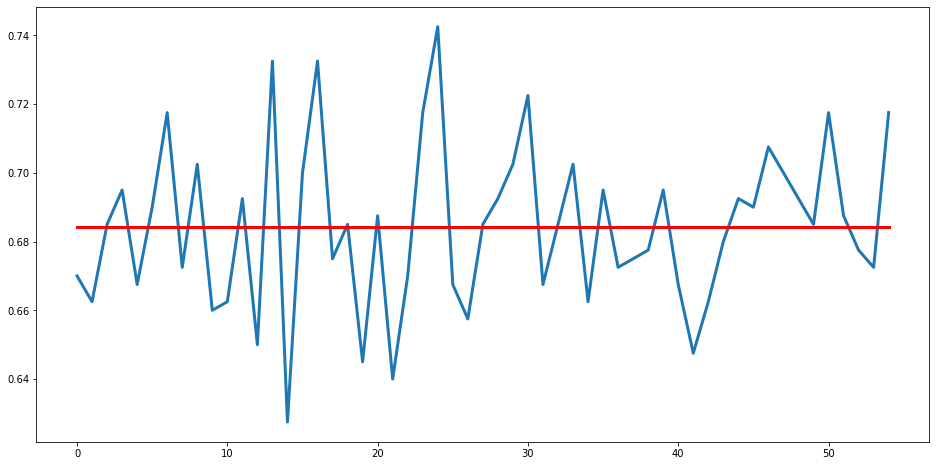

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"]=(16,8) 
plt.plot(perf, linewidth=3)
plt.plot(avg_perf, 'r', linewidth=3)

In [40]:
import pickle

In [41]:
#pickle.dump(final_model,open('25th_july.pk','wb'))